In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
from google.colab import files
uploaded=files.upload()

Saving matches.csv to matches (1).csv


In [64]:
import io
df=pd.read_csv(io.BytesIO(uploaded['matches.csv']))

In [65]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,4/5/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,4/6/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,4/7/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,4/8/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,4/8/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [66]:
df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

In [67]:
df.shape

(636, 18)

In [68]:
df.drop(['umpire3'],axis=1,inplace=True)

In [69]:
df.columns


Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2'],
      dtype='object')

In [70]:
Teams={
    'Royal Challengers Bangalore':'RCB', 
    'Sunrisers Hyderabad':'SRH',
       'Rising Pune Supergiant':'RPS', 
       'Mumbai Indians':'MI',
       'Kolkata Knight Riders':'KKR', 
       'Gujarat Lions':'GL', 
       'Kings XI Punjab':'KXIP',
       'Delhi Daredevils':'DD', 
       'Chennai Super Kings':'CSK', 
       'Rajasthan Royals':'RR',
       'Deccan Chargers':'DC', 
       'Kochi Tuskers Kerala':'KTK', 
       'Pune Warriors':'PW',
       'Rising Pune Supergiants':'RPS'
}
df['team1']=df['team1'].map(Teams)
df['team2']=df['team2'].map(Teams)
df['toss_winner']=df['toss_winner'].map(Teams)
df['winner']=df['winner'].map(Teams)


In [71]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,4/5/2017,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,4/6/2017,MI,RPS,RPS,field,normal,0,RPS,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,4/7/2017,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,4/8/2017,RPS,KXIP,KXIP,field,normal,0,KXIP,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,4/8/2017,RCB,DD,RCB,bat,normal,0,RCB,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


**Total matches played**

In [72]:
df.shape[0]

636

**Total Venues**

In [73]:
len(df['city'].unique())

31

**Total teams**

In [74]:
len(df['team1'].unique())

13

**Most MOM Award**

In [75]:
df['player_of_match'].value_counts()

CH Gayle          18
YK Pathan         16
DA Warner         15
AB de Villiers    15
SK Raina          14
                  ..
KK Cooper          1
Shoaib Akhtar      1
RJ Harris          1
CRD Fernando       1
GD McGrath         1
Name: player_of_match, Length: 201, dtype: int64

**Maximum win by runs** 

In [76]:
df[df['win_by_runs']==df['win_by_runs'].max()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
43,44,2017,Delhi,5/6/2017,MI,DD,DD,field,normal,0,MI,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan


**Maximum win by wickets**

In [77]:
df[df['win_by_wickets']==df['win_by_wickets'].max()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
2,3,2017,Rajkot,4/7/2017,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
34,35,2017,Chandigarh,4/30/2017,DD,KXIP,KXIP,field,normal,0,KXIP,0,10,Sandeep Sharma,"Punjab Cricket Association IS Bindra Stadium, ...",YC Barde,CK Nandan
71,72,2008,Mumbai,4/27/2008,MI,DC,DC,field,normal,0,DC,0,10,AC Gilchrist,Dr DY Patil Sports Academy,Asad Rauf,SL Shastri
119,120,2009,Cape Town,4/19/2009,KXIP,DD,DD,field,normal,1,DD,0,10,DL Vettori,Newlands,MR Benson,SD Ranade
183,184,2010,Bangalore,3/18/2010,RR,RCB,RCB,field,normal,0,RCB,0,10,JH Kallis,M Chinnaswamy Stadium,K Hariharan,DJ Harper
298,299,2011,Mumbai,5/20/2011,MI,RR,MI,bat,normal,0,RR,0,10,SR Watson,Wankhede Stadium,RE Koertzen,PR Reiffel
376,377,2012,Jaipur,5/20/2012,RR,MI,RR,bat,normal,0,MI,0,10,DR Smith,Sawai Mansingh Stadium,HDPK Dharmasena,C Shamshuddin
390,391,2013,Chandigarh,4/10/2013,KXIP,CSK,CSK,field,normal,0,CSK,0,10,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Aleem Dar,C Shamshuddin
542,543,2015,Delhi,4/26/2015,DD,RCB,RCB,field,normal,0,RCB,0,10,VR Aaron,Feroz Shah Kotla,M Erasmus,S Ravi
590,591,2016,Rajkot,4/21/2016,GL,SRH,SRH,field,normal,0,SRH,0,10,B Kumar,Saurashtra Cricket Association Stadium,K Bharatan,HDPK Dharmasena


**Toss Decision across Seasons**

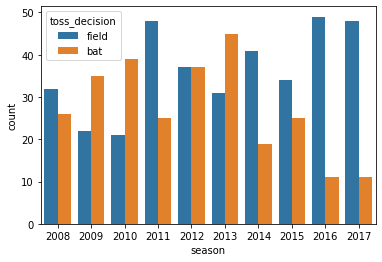

In [78]:
sns.countplot(x="season",hue="toss_decision",data=df)

**Maximum Toss Winners**

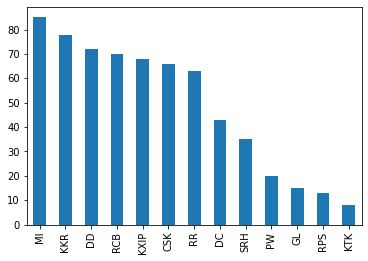

In [79]:
df['toss_winner'].value_counts().plot(kind="bar")

**Total matches vs wins for teams**

In [80]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,4/5/2017,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,4/6/2017,MI,RPS,RPS,field,normal,0,RPS,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,4/7/2017,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,4/8/2017,RPS,KXIP,KXIP,field,normal,0,KXIP,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,4/8/2017,RCB,DD,RCB,bat,normal,0,RCB,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [81]:
teams=(df['team1'].value_counts()+df['team2'].value_counts()).reset_index()
teams.columns=['team_name','matches_played']
teams

,team_name,matches_played
0,CSK,131
1,DC,75
2,DD,147
3,GL,30
4,KKR,148
5,KTK,14
6,KXIP,148
7,MI,157
8,PW,46
9,RCB,152


In [82]:
wins=df['winner'].value_counts().reset_index()
wins.columns=['team_name','matches_win']
wins

,team_name,matches_win
0,MI,92
1,CSK,79
2,KKR,77
3,RCB,73
4,KXIP,70
5,RR,63
6,DD,62
7,SRH,42
8,DC,29
9,RPS,15


In [84]:
player=teams.merge(wins,left_on="team_name",right_on="team_name",how="inner")
player

,team_name,matches_played,matches_win
0,CSK,131,79
1,DC,75,29
2,DD,147,62
3,GL,30,13
4,KKR,148,77
5,KTK,14,6
6,KXIP,148,70
7,MI,157,92
8,PW,46,12
9,RCB,152,73


In [85]:
player["%win"]=(player['matches_win']/player['matches_played'])*100

In [86]:
player

,team_name,matches_played,matches_win,%win
0,CSK,131,79,60.305344
1,DC,75,29,38.666667
2,DD,147,62,42.176871
3,GL,30,13,43.333333
4,KKR,148,77,52.027027
5,KTK,14,6,42.857143
6,KXIP,148,70,47.297297
7,MI,157,92,58.598726
8,PW,46,12,26.086957
9,RCB,152,73,48.026316


In [88]:
import plotly.offline as pl
import plotly.graph_objs as go

In [90]:
trace1=go.Bar(x=player['team_name'],y=player['matches_played'],name="Total_Matches")
trace2=go.Bar(x=player['team_name'],y=player['matches_win'],name="Total_wins")
pl.iplot([trace1,trace2])

**Matches played across each season**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



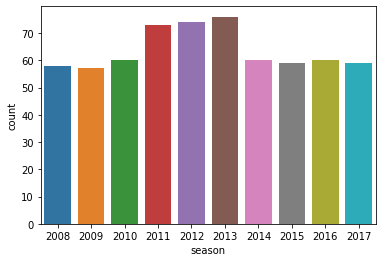

In [91]:
sns.countplot(df['season'])

**Runs across the seasons**

In [93]:

from google.colab import files
uploaded=files.upload()

Saving deliveries.csv to deliveries.csv


In [94]:

import io
df2=pd.read_csv(io.BytesIO(uploaded["deliveries.csv"]))

In [95]:
season=df[['id','season']].merge(df2,left_on='id',right_on='match_id',how="left").drop('id',axis=1)
season

,season,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150455,2016,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,Sachin Baby,CJ Jordan,B Kumar,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
150456,2016,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,Sachin Baby,CJ Jordan,B Kumar,0,0,0,0,0,0,0,0,0,CJ Jordan,run out,NV Ojha
150457,2016,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,Iqbal Abdulla,Sachin Baby,B Kumar,0,0,0,1,0,0,0,1,1,NaN,NaN,NaN
150458,2016,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,Iqbal Abdulla,B Kumar,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN


In [98]:
season=season.groupby('season')['total_runs'].sum().reset_index()
season.set_index('season',inplace=True)

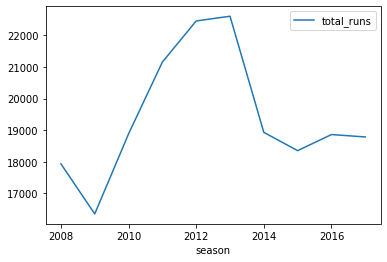

In [99]:
season.plot()

**Aveage runs**

In [101]:
avg_runs=df.groupby('season')['id'].count().reset_index().rename(columns={
    'id':'matches'
})
avg_runs

,season,matches
0,2008,58
1,2009,57
2,2010,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


In [109]:
season

,season,total_runs
0,2008,17937
1,2009,16353
2,2010,18883
3,2011,21154
4,2012,22453
5,2013,22602
6,2014,18931
7,2015,18353
8,2016,18862
9,2017,18786


In [111]:

season=pd.concat([avg_runs,season.iloc[:,1]],axis=1)

In [115]:
season['per_match_runs']=season['total_runs']/season['matches']

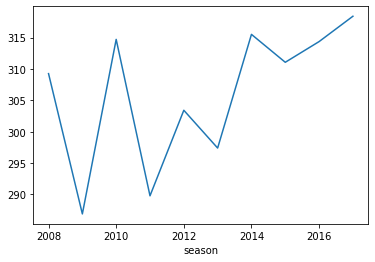

In [118]:
season.set_index('season')['per_match_runs'].plot()

**Most lucky ground for teams**

In [123]:
def lucky(df,team_name):
  return df[df['winner']==team_name]['venue'].value_counts().nlargest(5)

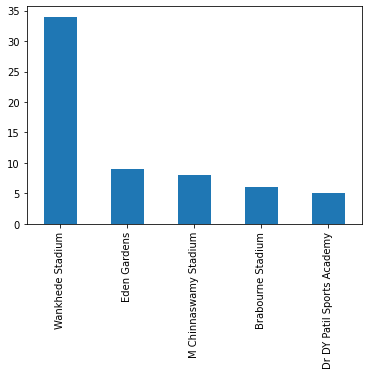

In [125]:
lucky(df,'MI').plot(kind='bar')

**Comparison between two teams on basis of their wins**

In [126]:
def comparison(team1,team2):
  compare=df[(((df['team1']==team1)|(df['team2']==team1)) & ((df['team1']==team2)|(df['team2']==team2)))]
  sns.countplot(x='season',hue="winner",data=compare)

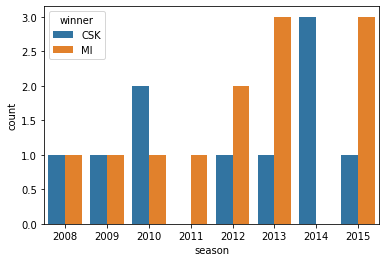

In [127]:
comparison('MI','CSK')